<a href="https://colab.research.google.com/github/MostaryKhatun/Bioinformatrics_Thesis/blob/main/UsingFisharScore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

stage1_fisher_score_calculation.py

In [ ]:
# Fisher Score calculation in Google Colab for two uploaded datasets

import os
import numpy as np
import pandas as pd
from google.colab import files

# --- Fisher Score function ---
def fisher_score(X, y):
    classes = np.unique(y)
    num_features = X.shape[1]
    scores = np.zeros(num_features)

    for i in range(num_features):
        feature = X.iloc[:, i]
        mean_total = np.mean(feature)
        numerator = 0
        denominator = 0

        for c in classes:
            class_data = feature[y == c]
            mean_class = np.mean(class_data)
            numerator += len(class_data) * (mean_class - mean_total) ** 2
            denominator += len(class_data) * np.var(class_data)

        scores[i] = numerator / (denominator + 1e-10)  # Avoid division by zero

    return scores

# --- Step 1: Upload datasets ---
print("Please upload exactly two CSV files: e.g., 'GSE22356_matrix_Transpose_labeled.csv'")
uploaded = files.upload()

# Output directory inside Colab
output_root_directory = './Processed_Datasets'
score_dir = os.path.join(output_root_directory, 'Score')
os.makedirs(score_dir, exist_ok=True)

# --- Step 2: Process uploaded datasets ---
for filename in uploaded.keys():
    if filename.endswith('.csv'):
        try:
            df = pd.read_csv(filename)
        except Exception as e:
            print(f"Error reading file '{filename}': {e}")
            continue

        if df.shape[1] < 2:
            print(f"File '{filename}' does not have enough columns. Skipping.")
            continue

        try:
            X = df.iloc[:, :-1]  # Features
            y = df.iloc[:, -1]   # Target

            # Calculate Fisher Scores
            raw_scores = fisher_score(X, y)

            # Normalize scores
            min_score, max_score = np.min(raw_scores), np.max(raw_scores)
            normalized_scores = (raw_scores - min_score) / (max_score - min_score)

            # Save results
            feature_scores = pd.DataFrame({
                'Feature': X.columns,
                'Fisher Score': raw_scores,
                'Normalized Fisher Score': normalized_scores,
            })

            dataset_name = os.path.splitext(filename)[0]
            output_file = os.path.join(score_dir, f'{dataset_name}_Fisher_Scores.csv')
            feature_scores.to_csv(output_file, index=False)
            print(f"✅ Fisher Scores for '{dataset_name}' saved to '{output_file}'")

        except Exception as e:
            print(f"Error processing file '{filename}': {e}")

print("🎯 All uploaded datasets processed with Fisher scores.")


Please upload exactly two CSV files: e.g., 'GSE22356_matrix_Transpose_labeled.csv'


Saving GSE20966.top.table.csv to GSE20966.top.table.csv
Saving GSE63878.top.table.csv to GSE63878.top.table (1).csv
Saving GSE98793.top.table.csv to GSE98793.top.table (2).csv
Error processing file 'GSE20966.top.table.csv': '<' not supported between instances of 'str' and 'float'
Error processing file 'GSE63878.top.table (1).csv': '<' not supported between instances of 'float' and 'str'
Error processing file 'GSE98793.top.table (2).csv': '<' not supported between instances of 'str' and 'float'
🎯 All uploaded datasets processed with Fisher scores.


stage2_feature_selection_plot_column.py

Upload exactly two CSV files:


Saving GSE20966.top.table.csv to GSE20966.top.table (1).csv
Saving GSE63878.top.table.csv to GSE63878.top.table (2).csv
Saving GSE98793.top.table.csv to GSE98793.top.table (3).csv


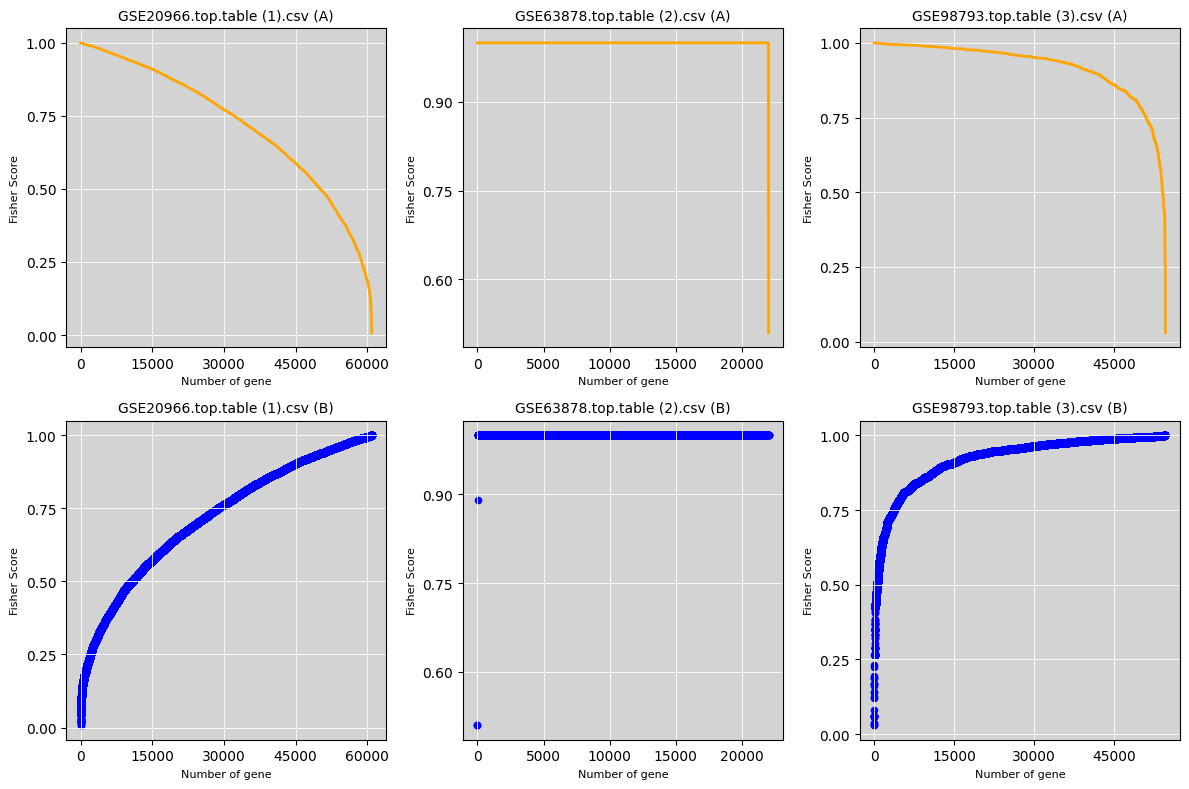

Plotting completed successfully.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import io
import os

def plot_dynamic_subplots_from_files(file_dict, output_folder):
    os.makedirs(output_folder, exist_ok=True)

    csv_files = list(file_dict.items())
    num_files = len(csv_files)
    if num_files == 0:
        print("No files uploaded!")
        return
    num_rows = 2
    num_cols = num_files

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(num_cols * 4, 8))

    if num_files == 1:
        axs = np.array([[axs[0]], [axs[1]]])
    else:
        axs = np.atleast_2d(axs)

    for i, (file_name, file_obj) in enumerate(csv_files):
        try:
            title_part = file_name.split('_')[0]
            df = pd.read_csv(file_obj)
            column_number = 1
            df_sorted = df.sort_values(by=df.columns[column_number], ascending=False)

            axs[0, i].set_facecolor('lightgray')
            axs[0, i].plot(range(len(df_sorted)), df_sorted[df_sorted.columns[column_number]], color='orange', linewidth=2)
            axs[0, i].set_title(f'{title_part} (A)', fontsize=10)
            axs[0, i].set_ylabel('Fisher Score', fontsize=8)
            axs[0, i].set_xlabel('Number of gene', fontsize=8)
            axs[0, i].xaxis.set_major_locator(plt.MaxNLocator(5))
            axs[0, i].yaxis.set_major_locator(plt.MaxNLocator(5))
            axs[0, i].grid(True, linestyle='-', color='white', linewidth=0.6)

            axs[1, i].set_facecolor('lightgray')
            axs[1, i].scatter(range(len(df)), df[df.columns[column_number]], color='blue', s=20)
            axs[1, i].set_title(f'{title_part} (B)', fontsize=10)
            axs[1, i].set_ylabel('Fisher Score', fontsize=8)
            axs[1, i].set_xlabel('Number of gene', fontsize=8)
            axs[1, i].xaxis.set_major_locator(plt.MaxNLocator(5))
            axs[1, i].yaxis.set_major_locator(plt.MaxNLocator(5))
            axs[1, i].grid(True, linestyle='-', color='white', linewidth=0.6)

        except Exception as e:
            print(f"Error processing file '{file_name}': {e}. Skipping this file.")
            continue

    plt.tight_layout()

    output_path_base = f'{output_folder}/combined_plot_fisher_score_column_{column_number}'
    plt.savefig(f'{output_path_base}.png', dpi=300)
    plt.savefig(f'{output_path_base}.jpg', dpi=300)
    plt.savefig(f'{output_path_base}.pdf', dpi=300)
    plt.savefig(f'{output_path_base}.svg', dpi=300)
    plt.show()

print("Upload exactly two CSV files:")
uploaded_files = files.upload()

file_objs = {}
for fname, fbytes in uploaded_files.items():
    file_objs[fname] = io.BytesIO(fbytes)

plot_dynamic_subplots_from_files(file_objs, output_folder='./Plots')

print("Plotting completed successfully.")


stage3_feature_selection.py

In [ ]:
import os
import pandas as pd
from google.colab import files
import io

# Colab-এ ফোল্ডার তৈরি
output_root = './Processed_Datasets'
score_dir = os.path.join(output_root, 'Score')
report_dir = os.path.join(output_root, 'Report')
selection_dir = os.path.join(output_root, 'Selection')

os.makedirs(score_dir, exist_ok=True)
os.makedirs(report_dir, exist_ok=True)
os.makedirs(selection_dir, exist_ok=True)

# ফাইল আপলোড করানো
print("Upload your dataset CSVs and Fisher Score CSVs (all together):")
uploaded = files.upload()

# আপলোড করা ফাইলগুলো সেভ করা যথাযথ ফোল্ডারে
for fname, content in uploaded.items():
    clean_name = fname.replace(" (1)", "").strip()
    if clean_name.endswith('_Fisher_Scores.csv'):
        path = os.path.join(score_dir, clean_name)
    else:
        path = os.path.join(output_root, clean_name)
    with open(path, 'wb') as f:
        f.write(content)

print(f"Saved {len(uploaded)} files.")

# লিস্ট তৈরি করা available datasets এর (যে ফাইলের Fisher Score আছে)
score_files = [f for f in os.listdir(score_dir) if f.endswith('_Fisher_Scores.csv')]
dataset_names = [f.replace('_Fisher_Scores.csv', '') for f in score_files]

print("Available datasets:")
for i, name in enumerate(dataset_names, 1):
    print(f"{i}. {name}")

# ইউজার থেকে dataset selection
selected_indices = input("\nEnter the indices of datasets to process (e.g., 1 2): ").strip().split()
selected_indices = [int(i) - 1 for i in selected_indices if i.isdigit() and 0 <= int(i) - 1 < len(dataset_names)]

# প্রতিটি সিলেক্টেড dataset প্রসেস করা
for idx in selected_indices:
    dataset_name = dataset_names[idx]
    score_file = os.path.join(score_dir, f"{dataset_name}_Fisher_Scores.csv")

    # Fisher score লোড
    feature_scores = pd.read_csv(score_file)

    # মূল dataset লোড (যে ফাইল আপলোড করেছ সেটাই)
    dataset_file = os.path.join(output_root, f"{dataset_name}.csv")
    print(f"\nLoading dataset: {dataset_file}")
    df = pd.read_csv(dataset_file)

    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]

    # ফিচার স্কোর descending sort
    sorted_scores = feature_scores.sort_values(by='Fisher Score', ascending=False)

    # ইউজার থেকে সিলেকশন মেথড ইনপুট
    print(f"\nSelect feature selection method for {dataset_name}:")
    print("1. Select features by score threshold")
    print("2. Select top N features")

    while True:
        try:
            choice = int(input("Enter choice (1 or 2): "))
            if choice in [1, 2]:
                break
            else:
                print("Please enter 1 or 2 only.")
        except:
            print("Invalid input. Enter 1 or 2.")

    report_details = {"dataset_name": dataset_name, "chosen_option": "", "selected_feature_count": 0}
    sel_type = ''
    sel_value = 0

    if choice == 1:
        while True:
            try:
                threshold = float(input("Enter Fisher score threshold (e.g. 0.01): "))
                break
            except:
                print("Invalid number. Try again.")
        selected_features = sorted_scores[sorted_scores['Fisher Score'] >= threshold]['Feature']
        report_details["chosen_option"] = f"Score threshold >= {threshold}"
        report_details["selected_feature_count"] = len(selected_features)
        sel_type = 'Threshold'
        sel_value = threshold

    else:
        while True:
            try:
                top_n = int(input("Enter number of top features to select (e.g. 100): "))
                break
            except:
                print("Invalid number. Try again.")
        selected_features = sorted_scores.head(top_n)['Feature']
        report_details["chosen_option"] = f"Top {top_n} features"
        report_details["selected_feature_count"] = top_n
        sel_type = 'Top'
        sel_value = top_n

    # সিলেক্টেড ফিচার + টার্গেট একসাথে সেভ করা
    X_selected = X[selected_features]
    result_df = pd.concat([X_selected, y], axis=1)
    selection_file = os.path.join(selection_dir, f"{dataset_name}_Selected_{sel_type}_{sel_value}_Features.csv")
    result_df.to_csv(selection_file, index=False)
    print(f"Selected features saved to: {selection_file}")

    # রিপোর্ট ফাইল সেভ করা
    report_file = os.path.join(report_dir, f"{dataset_name}_Feature_Selection_Report.txt")
    with open(report_file, 'w') as f:
        f.write("Fisher Score Feature Selection Report\n")
        f.write("=====================================\n")
        f.write(f"Dataset Name: {dataset_name}\n")
        f.write(f"Selected Option: {report_details['chosen_option']}\n")
        f.write(f"Number of Selected Features: {report_details['selected_feature_count']}\n")
        f.write(f"Output CSV File: {selection_file}\n")
        f.write(f"Fisher Scores CSV File: {score_file}\n")

    print(f"Report saved to: {report_file}")

print("\nAll selected datasets processed successfully.")


Upload your dataset CSVs and Fisher Score CSVs (all together):


Saving GSE63878_matrix_Transpose_labeled.csv to GSE63878_matrix_Transpose_labeled.csv
Saving GSE63878_matrix_Transpose_labeled_Fisher_Scores.csv to GSE63878_matrix_Transpose_labeled_Fisher_Scores.csv
Saving GSE98793_matrix_Transpose_labeled.csv to GSE98793_matrix_Transpose_labeled.csv
Saving GSE98793_matrix_Transpose_labeled_Fisher_Scores.csv to GSE98793_matrix_Transpose_labeled_Fisher_Scores.csv
Saved 4 files.
Available datasets:
1. GSE98793_matrix_Transpose_labeled
2. GSE63878_matrix_Transpose_labeled

Enter the indices of datasets to process (e.g., 1 2): 1 2

Loading dataset: ./Processed_Datasets/GSE98793_matrix_Transpose_labeled.csv

Select feature selection method for GSE98793_matrix_Transpose_labeled:
1. Select features by score threshold
2. Select top N features
Enter choice (1 or 2): 2
Enter number of top features to select (e.g. 100): 800
Selected features saved to: ./Processed_Datasets/Selection/GSE98793_matrix_Transpose_labeled_Selected_Top_800_Features.csv
Report saved to: 

stage2_feature_selection_plot_row.py

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import os

def plot_dynamic_subplots_from_folder(folder_path, output_folder):
    # Ensure the output folder exists
    os.makedirs(output_folder, exist_ok=True)

    # Get all CSV files in the folder
    csv_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv') and not f.startswith('._')]
    num_files = len(csv_files)
    num_plots = num_files * 2  # Each file requires two plots
    num_rows = math.ceil(num_plots / 2)  # Calculate required rows

    # Define a square figure size
    fig, axs = plt.subplots(num_rows, 2, figsize=(8, num_rows * 4))  # Adjusted figure size for compact layout
    axs = axs.flatten()

    for i, csv_file in enumerate(csv_files):
        # Extract the title from the filename
        file_name = os.path.basename(csv_file)
        title_part = file_name.split('_')[0]  # Take the part before the first underscore

        # Load the CSV file
        df = pd.read_csv(csv_file)
        # Column Number
        column_number = 1
        df_sorted = df.sort_values(by=df.columns[column_number], ascending=False)

        # Plot the sorted data as a curve plot
        if i * 2 < len(axs):  # Ensure index is within bounds
            axs[i * 2].set_facecolor('lightgray')
            axs[i * 2].plot(range(len(df_sorted)), df_sorted[df_sorted.columns[column_number]], color='orange', linewidth=2)
            axs[i * 2].set_title(f'{title_part} (A)', fontsize=10)
            axs[i * 2].set_ylabel('Fisher Score', fontsize=8)
            axs[i * 2].set_xlabel('Number of gene', fontsize=8)

            # Set custom ticks for x and y axes for less clutter
            axs[i * 2].xaxis.set_major_locator(plt.MaxNLocator(5))  # Reduce x-axis ticks
            axs[i * 2].yaxis.set_major_locator(plt.MaxNLocator(5))  # Reduce y-axis ticks
            axs[i * 2].grid(True, linestyle='-', color='white', linewidth=0.6)

        # Plot the raw data as a scatter plot
        if i * 2 + 1 < len(axs):  # Ensure index is within bounds
            axs[i * 2 + 1].set_facecolor('lightgray')
            axs[i * 2 + 1].scatter(range(len(df)), df[df.columns[column_number]], color='blue', s=20)  # Reduced marker size
            axs[i * 2 + 1].set_title(f'{title_part} (B)', fontsize=10)
            axs[i * 2 + 1].set_ylabel('Fisher Score', fontsize=8)
            axs[i * 2 + 1].set_xlabel('Number of gene', fontsize=8)

            # Set custom ticks for x and y axes
            axs[i * 2 + 1].xaxis.set_major_locator(plt.MaxNLocator(5))  # Reduce x-axis ticks
            axs[i * 2 + 1].yaxis.set_major_locator(plt.MaxNLocator(5))  # Reduce y-axis ticks
            axs[i * 2 + 1].grid(True, linestyle='-', color='white', linewidth=0.6)

    # Hide any unused subplots
    for j in range(i * 2 + 2, len(axs)):
        axs[j].axis('off')

    # Optimize layout spacing
    plt.tight_layout()  # Automatically adjust subplot parameters for a tight layout

    # Save the figure as an image file in the specified output folder
    output_path_base = os.path.join(output_folder, f'combined_plot_fisher_score_row_{column_number}')
    plt.savefig(f'{output_path_base}.png', format='png', dpi=1000)
    plt.savefig(f'{output_path_base}.jpg', format='jpg', dpi=1000)
    plt.savefig(f'{output_path_base}.pdf', format='pdf', dpi=1000)
    plt.savefig(f'{output_path_base}.svg', format='svg', dpi=1000)

    # Show the plot
    # plt.show()

# Example usage
folder_path = './Processed_Datasets/Score'  # Folder containing the CSV files
output_folder = './Processed_Datasets/Plots'  # Folder to save the output plot
plot_dynamic_subplots_from_folder(folder_path, output_folder)
print("Plotting completed successfully.")